# Matplotlib: Advanced Customization

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customize Line Chart

### 1. Copy pivot table and existing line chart from Exercise 2-12 Exercise Trending Skills

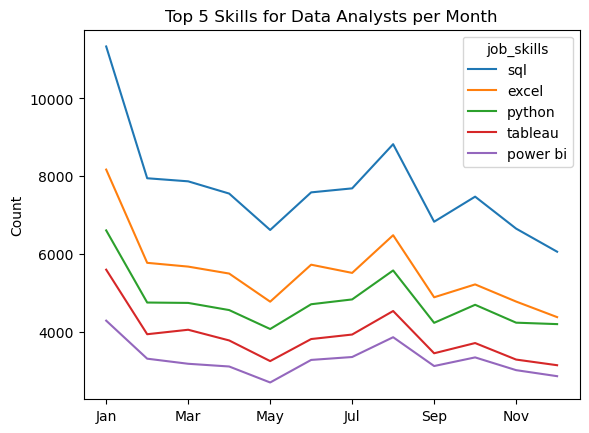

In [3]:
# Copy pivot table code from #2_12_Exercise_Trending_Skills

# Add the job posted month number column
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode out the job skills column so each are on seperate rows
df_DA_explode = df_DA.explode('job_skills')

# Pivot the data to get a count of postings for each month for each skill
# NaN values replaced with 0
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Add a total index so we can filter down to skills mentioned the most often for the year
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

# Sort the skills by the total row
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

# Drop the total column so it doesn't throw the chart off
df_DA_pivot = df_DA_pivot.drop('Total')

# Limit data to top 5 skills
# specifying all rows and first 5 columns:  [ :, :5 ]
df_DA_pivot_top_5 = df_DA_pivot.iloc[ : , :5]

# Display Month abbreviations instead of number
df_DA_pivot_top_5 = df_DA_pivot_top_5.reset_index()
df_DA_pivot_top_5['job_posted_month'] = df_DA_pivot_top_5['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot_top_5 = df_DA_pivot_top_5.set_index('job_posted_month')
df_DA_pivot_top_5 = df_DA_pivot_top_5.drop(columns='job_posted_month_no')

df_DA_pivot_top_5.plot(kind="line")

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

### 2. Customize Line Chart
[matplotlib.lines.Line2D Properties](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

#### [Custom Line Width](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linewidth)

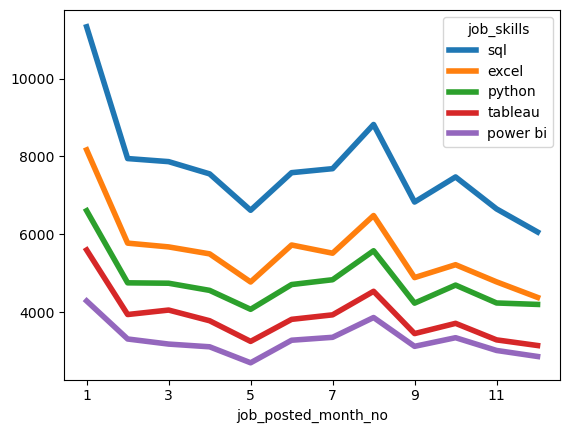

In [4]:
# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4 # Because it's a line chart, can specify the line width
)

plt.show()

#### [Custom Line Style](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

| linestyle | description |
|----------------------|--------------------|
|'-' or 'solid'|solid line|
|'--' or 'dashed'|dashed line|
|'-.' or 'dashdot'|dash-dotted line|
|':' or 'dotted'|dotted line|
|'none', 'None', ' ', or ''|draw nothing|

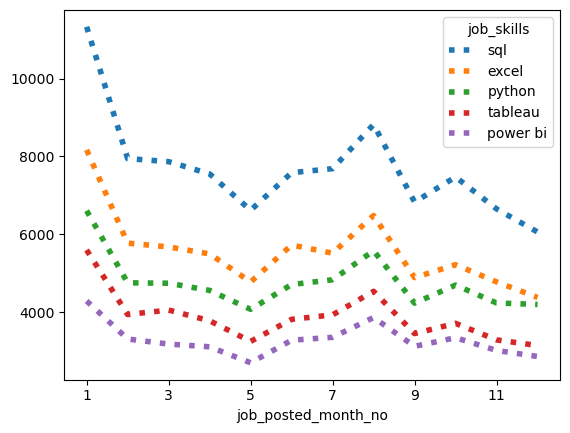

In [5]:
# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4, # Because it's a line chart, can specify the line width
    linestyle=':' # dotted line
)

plt.show()

#### [Custom Color Map](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
from matplotlib import colormaps
list(colormaps)

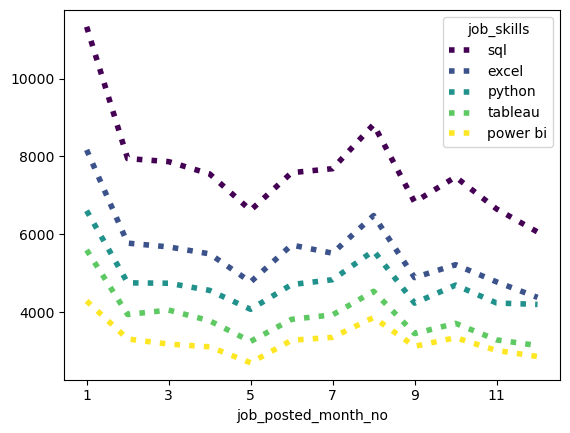

In [7]:
# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4, # Because it's a line chart, can specify the line width
    linestyle=':', # dotted line
    colormap='viridis' # see cheatsheet for visual examples of options here
)

plt.show()

#### [Custom Marker](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

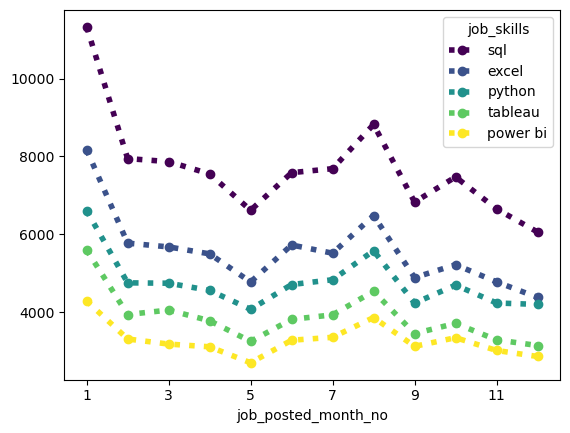

In [8]:
# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4, # Because it's a line chart, can specify the line width
    linestyle=':', # dotted line
    colormap='viridis', # see cheatsheet for visual examples of options here
    marker='o' # See matplotlib.markers for options
)

plt.show()

#### [Custom Marker Size](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_markersize)

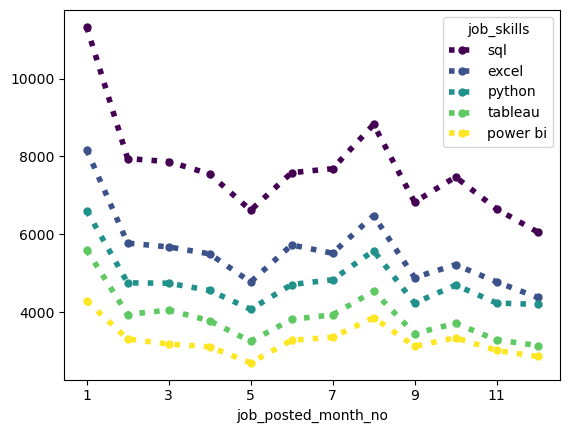

In [9]:
# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4, # Because it's a line chart, can specify the line width
    linestyle=':', # dotted line
    colormap='viridis', # see cheatsheet for visual examples of options here
    marker='o', # See matplotlib.markers for options
    markersize=5, # Slighly larger than the line width
)

plt.show()

#### [Custom Figure Size(df.plot(figsize=...))](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

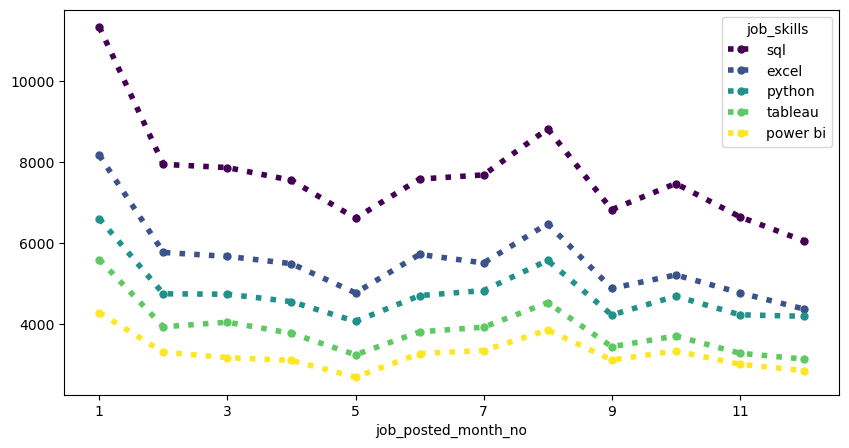

In [10]:
# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4, # Because it's a line chart, can specify the line width
    linestyle=':', # dotted line
    colormap='viridis', # see cheatsheet for visual examples of options here
    marker='o', # See matplotlib.markers for options
    markersize=5, # Slighly larger than the line width
    figsize=(10,5) #Size of a figure object: a tuple (width, height) in inches
)

plt.show()

#### Cleanup Title and Labels ( Final Visualization )

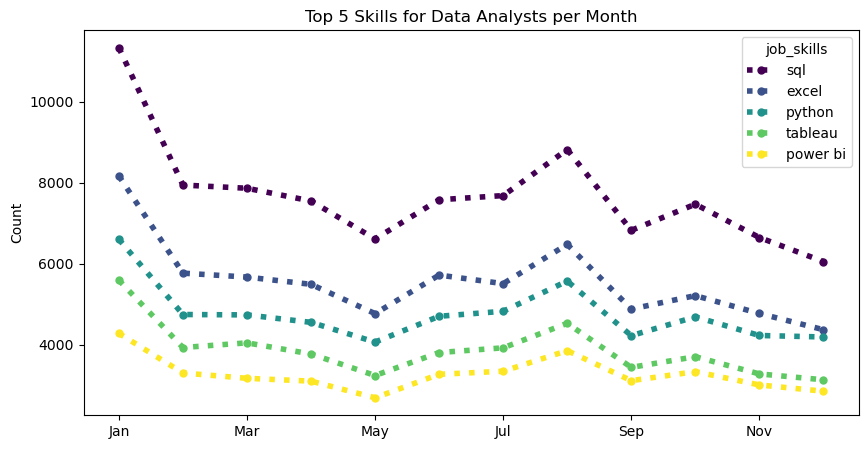

In [11]:
# Display Month abbreviations instead of number
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Plot adjustment for top 5 skills
df_DA_pivot.iloc[ : , :5].plot(
    kind='line',
    linewidth=4, # Because it's a line chart, can specify the line width
    linestyle=':', # dotted line
    colormap='viridis', # see cheatsheet for visual examples of options here
    marker='o', # See matplotlib.markers for options
    markersize=5, # Slighly larger than the line width
    figsize=(10,5) #Size of a figure object: a tuple (width, height) in inches
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Customize Scatter Chart

### 1. Copy previous scatter plot data from Lesson 2-15_Matplotlib_Scatter_plots

In [12]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


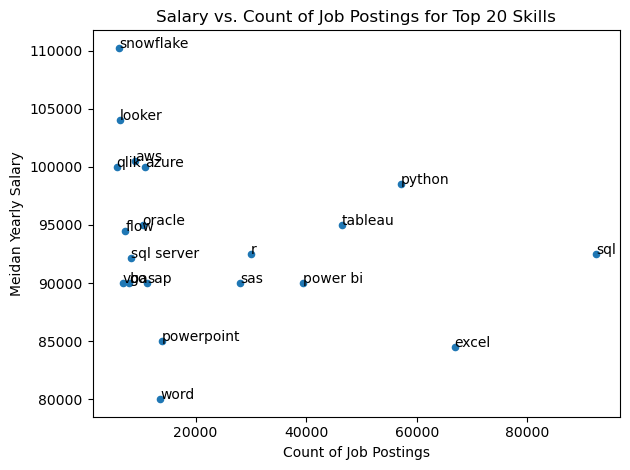

In [13]:
# Plot to show the overlap when too many points on graph
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Meidan Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

### 2. Use Adjust Text to adjust the placement of the labels
* [adjustText](https://adjusttext.readthedocs.io/en/latest/)
    * [Examples with Visuals](https://adjusttext.readthedocs.io/en/latest/Examples.html#Examples)
    * [adjustText.adjust_text()](https://adjusttext.readthedocs.io/en/latest/#module-adjustText)
    * [install in anaconda](https://github.com/Phlya/adjustText/?tab=readme-ov-file#installation)
        * conda install -c conda-forge adjusttext 

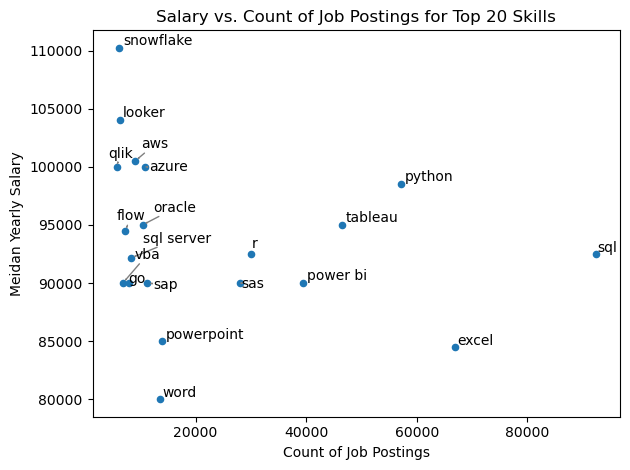

In [14]:
# Plot with Adjust Text
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
    

adjust_text(texts,  arrowprops=dict(arrowstyle='->', color='gray', lw=1))

plt.xlabel('Count of Job Postings')
plt.ylabel('Meidan Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

### 3. Use ticker.FuncFormatter to format the Y axis numbers

* [matplotlib.pyplot.gca()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca)
    * Get Axis of current figure
* [matplotlib.axes.Axes.yaxis](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.yaxis.html#matplotlib.axes.Axes.yaxis)
    * Get the y axis from the figure axes
* [matplotlib.axis.Axis.set_major_formatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter)
    * Apply a custom formatter for the given axis's major ticker
    * Major Ticker -The main ticks that mark significant intervals along an axis.
* [matplotlib.ticker.FuncFormatter()](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.FuncFormatter)
    * Supply a formatter function to format the tickers(tick marks) on an axis
    * The function should take in two inputs (a tick value <b>x</b> and a position <b>pos</b>), and return a string containing the corresponding tick label.



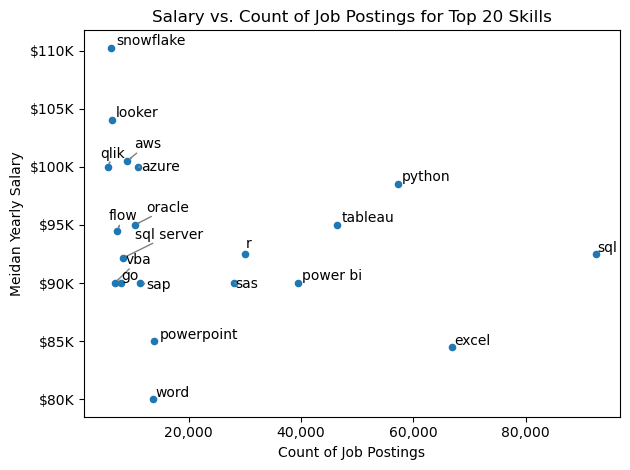

In [ ]:
# Adjust the Y axis labels
from adjustText import adjust_text



skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
    

adjust_text(texts,  arrowprops=dict(arrowstyle='->', color='gray', lw=1))

# Need to get the access object to apply the label adjustments to. Must be called after the plotting call
ax = plt.gca() # gca = Get Current Axis

# Format the y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Format the x axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Meidan Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

# Problems

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Job Postings Trend for Cloud Engineers (2.16.1) - Problem

/tmp/ipykernel_43971/2108613020.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


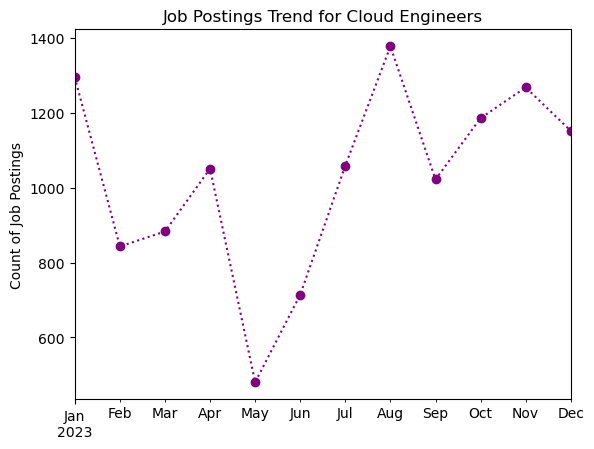

In [2]:
# Filter dataframe for only Cloud Engineering job postings
job_title = 'Cloud Engineer'
df_ce = df[df['job_title_short']== job_title].copy()

# Get the counts for each month for the given job title
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
df_ce_counts = df_ce.groupby('job_posted_month').size()

# Plot the line chart with custom styling
df_ce_counts.plot(
    kind='line', 
    x='job_posted_month', 
    y='job_count',
    marker='o',
    linestyle=':',
    color='purple'
    )

# Add title and proper labels
plt.title(f'Job Postings Trend for {job_title}s')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.legend().set_visible(False)
plt.show()

## Customize Bar Chart (2.16.2) - Problem

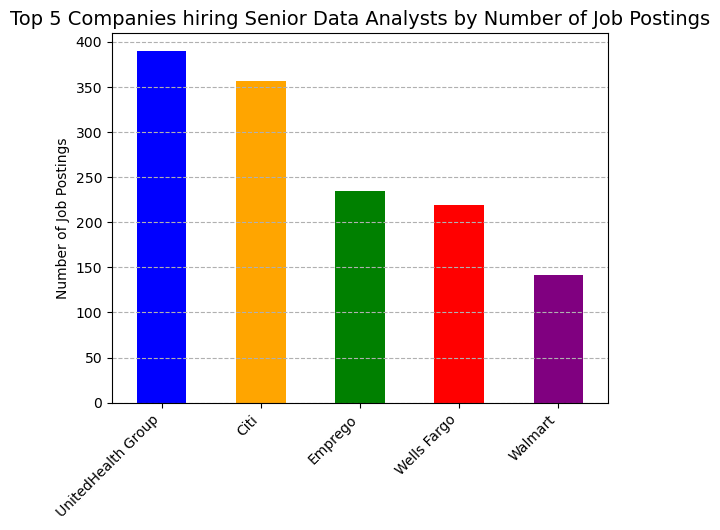

In [19]:
# Custom Bar Colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Top number of Companies to show
top_count_filter = 5

# Filtered Job Title
job_title_filter = 'Senior Data Analyst'

# Title font size
font_size = 14

# Filter down to jobs with the given job title
SDA_df = df[df['job_title_short'] == job_title_filter].copy()

# Get the Companies with most jobs for the given job title
SDA_counts = SDA_df.groupby('company_name').size()
SDA_counts = SDA_counts.reset_index(name='job_count')
SDA_counts = SDA_counts.sort_values(by='job_count', ascending=False).head(top_count_filter)

# Plot the bar chart
SDA_counts.plot(
    kind='bar',
    x='company_name',
    y='job_count',
    color=colors
)

plt.title(
    f'Top {top_count_filter} Companies hiring {job_title_filter}s by Number of Job Postings',
    fontsize=font_size
)
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Job Postings')
plt.legend().set_visible(False)
plt.grid(
    axis='y',
    linestyle='--'
)
plt.show()

